In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42,)

In [5]:
x.shape,y.shape

((1000, 10), (1000,))

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=18)

In [7]:
x_train.shape

(750, 10)

In [8]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
y_pred = log.predict(x_test)

In [10]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc = accuracy_score(y_pred,y_test)
print(acc)
print(classification_report(y_pred,y_test))

print(confusion_matrix(y_pred,y_test))


0.824
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       134
           1       0.78      0.86      0.82       116

    accuracy                           0.82       250
   macro avg       0.83      0.83      0.82       250
weighted avg       0.83      0.82      0.82       250

[[106  28]
 [ 16 100]]


In [12]:
mod = LogisticRegression()
penal = ['l1', 'l2', 'elasticnet']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
c_val = [1,10,100,0.1,0.01]


In [13]:
d = dict(penalty = penal,C = c_val,solver = solver)

In [14]:
d

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 10, 100, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [15]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(shuffle=True,random_state=43)

In [16]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=mod,param_grid=d,scoring='accuracy',cv = skf)

In [17]:
grid.fit(x_train,y_train)

c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\s

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [18]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [19]:
grid.cv_results_

{'mean_fit_time': array([0.00035315, 0.00186009, 0.000209  , 0.0002944 , 0.00019045,
        0.00501132, 0.00223651, 0.00110936, 0.00303159, 0.00326333,
        0.00232573, 0.00182519, 0.00019922, 0.00024586, 0.00028753,
        0.00019846, 0.00025983, 0.00030184, 0.00020242, 0.00750489,
        0.00025792, 0.00021238, 0.00024409, 0.01362891, 0.0023737 ,
        0.0013124 , 0.00241084, 0.00192876, 0.00257645, 0.00199857,
        0.00023613, 0.00019913, 0.00023942, 0.00019717, 0.00027399,
        0.00029287, 0.00019426, 0.0053442 , 0.00028977, 0.00017881,
        0.00020175, 0.01073885, 0.0027328 , 0.00120611, 0.0024766 ,
        0.00194559, 0.00245099, 0.00177794, 0.00018153, 0.0001761 ,
        0.00020108, 0.00017962, 0.00027213, 0.00021749, 0.00018024,
        0.00097504, 0.00021634, 0.00019917, 0.00019145, 0.00204873,
        0.00179863, 0.00106702, 0.00192246, 0.00163326, 0.00198283,
        0.00232067, 0.00018048, 0.00024977, 0.00019093, 0.000179  ,
        0.00017853, 0.00023208,

In [20]:
grid.best_estimator_,grid.best_params_,grid.best_score_

(LogisticRegression(C=0.01, penalty='l1', solver='saga'),
 {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'},
 np.float64(0.8813333333333333))

In [21]:
y_predi = grid.predict(x_test)

In [22]:
y_predi

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [23]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc = accuracy_score(y_predi,y_test)
print(acc)
print(classification_report(y_predi,y_test))

print(confusion_matrix(y_predi,y_test))

0.824
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       140
           1       0.76      0.88      0.82       110

    accuracy                           0.82       250
   macro avg       0.83      0.83      0.82       250
weighted avg       0.83      0.82      0.82       250

[[109  31]
 [ 13  97]]


## RandomIzed search CV


In [25]:
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(estimator=mod,param_distributions=d,scoring='accuracy',cv = skf,n_iter=5)


In [26]:
rand.fit(x_train,y_train)

c:\p\ven\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\p\ven\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\p\ven\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\p\ven\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\p\v

,estimator,LogisticRegression()
,param_distributions,"{'C': [1, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
rand.best_estimator_,rand.best_score_

(LogisticRegression(C=0.1, solver='liblinear'), np.float64(0.8733333333333334))

In [28]:
y_predii = rand.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc = accuracy_score(y_predii,y_test)
print(acc)
print(classification_report(y_predii,y_test))

print(confusion_matrix(y_predii,y_test))

0.824
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       134
           1       0.78      0.86      0.82       116

    accuracy                           0.82       250
   macro avg       0.83      0.83      0.82       250
weighted avg       0.83      0.82      0.82       250

[[106  28]
 [ 16 100]]


In [30]:
x,y = make_classification(n_samples=1000,n_features=10,n_classes=3,random_state=42,n_informative=4)

In [31]:
x.shape,y.shape

((1000, 10), (1000,))

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=18)

In [33]:
x_train,x_test

(array([[ 2.54612407,  1.25479362, -0.96707359, ..., -0.48100905,
         -0.17986848, -2.12985817],
        [ 0.02412823,  0.74814075, -0.38546406, ...,  2.73594733,
         -3.68038646, -3.88243227],
        [ 0.68395415, -1.76976361, -1.31187402, ...,  1.00722709,
          0.76245234, -0.52975276],
        ...,
        [ 0.87883663,  0.24887084,  0.28004226, ...,  2.51334327,
          2.71796135,  1.35253119],
        [-1.93130428, -2.10393296, -0.10667568, ..., -1.11368461,
          0.53030448,  1.99877755],
        [-0.56385704, -0.54882581, -1.01463637, ..., -1.12494261,
          1.28323367,  1.83094848]], shape=(750, 10)),
 array([[-0.1782757 , -0.73401024,  0.11768176, ...,  0.26798938,
          1.68070777,  1.53834399],
        [-1.5218161 , -0.65559336, -1.1953168 , ...,  0.2180174 ,
          0.46840109,  1.65363616],
        [-0.18784602, -1.11919577, -0.87950047, ..., -1.43030501,
          1.05319536,  1.18459923],
        ...,
        [-2.30820786, -0.29338591,  0

In [34]:
mod = LogisticRegression(multi_class='ovr')
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)

c:\p\ven\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [35]:
acc = accuracy_score(y_pred,y_test)
print(acc)
print(classification_report(y_pred,y_test))

print(confusion_matrix(y_pred,y_test))

0.68
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        85
           1       0.69      0.66      0.67        89
           2       0.54      0.59      0.56        76

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.69      0.68      0.68       250

[[66  3 16]
 [ 7 59 23]
 [ 7 24 45]]


### imBALANCED DATASet

In [36]:
x,y = make_classification(n_samples=10000,n_features=10,random_state=42,weights=[0.99])

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=42)

In [38]:
x_train.shape,x_test.shape

((2500, 10), (7500, 10))

In [39]:
d

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 10, 100, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [40]:
c_wt = [{0:y,1:n} for y in [1,10,50,100] for n in [1,10,50,100]]

In [41]:
c_wt

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [42]:
d = dict(penalty = penal,C = c_val,solver = solver,class_weight = c_wt)

In [43]:
d

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 10, 100, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [44]:
grid = GridSearchCV(estimator=mod,param_grid=d,scoring='accuracy')

In [45]:
grid.fit(x_train,y_train)

c:\p\ven\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use

,estimator,LogisticRegre...i_class='ovr')
,param_grid,"{'C': [1, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [46]:
y_pred = grid.predict(x_test)

In [47]:
acc = accuracy_score(y_pred,y_test)
print(acc)
print(classification_report(y_pred,y_test))
print("This is confusion matrix")
print(confusion_matrix(y_pred,y_test))

0.9852
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7498
           1       0.01      0.50      0.02         2

    accuracy                           0.99      7500
   macro avg       0.50      0.74      0.51      7500
weighted avg       1.00      0.99      0.99      7500

This is confusion matrix
[[7388  110]
 [   1    1]]


In [48]:
x,y = make_classification(n_samples=1000,n_classes=2,random_state=32)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=32,)

In [50]:
dumm = [0 for _ in range(0,len(y_test))]
len(dumm)

250

In [51]:
log = LogisticRegression()
rand

,estimator,LogisticRegression()
,param_distributions,"{'C': [1, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [52]:
rand.fit(x_train,y_train)

c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\p\ven\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters w

,estimator,LogisticRegression()
,param_distributions,"{'C': [1, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [53]:
mod_prob = rand.predict_proba(x_test)
mod_prob

array([[0.79987147, 0.20012853],
       [0.07866268, 0.92133732],
       [0.74100971, 0.25899029],
       [0.89011273, 0.10988727],
       [0.103424  , 0.896576  ],
       [0.88650946, 0.11349054],
       [0.85628608, 0.14371392],
       [0.0859378 , 0.9140622 ],
       [0.88945807, 0.11054193],
       [0.88726748, 0.11273252],
       [0.82106269, 0.17893731],
       [0.10537971, 0.89462029],
       [0.72346946, 0.27653054],
       [0.82274085, 0.17725915],
       [0.85953311, 0.14046689],
       [0.07283123, 0.92716877],
       [0.83152593, 0.16847407],
       [0.86937771, 0.13062229],
       [0.81422486, 0.18577514],
       [0.89261207, 0.10738793],
       [0.84924651, 0.15075349],
       [0.09238416, 0.90761584],
       [0.24759499, 0.75240501],
       [0.0629872 , 0.9370128 ],
       [0.70592286, 0.29407714],
       [0.31986767, 0.68013233],
       [0.86114556, 0.13885444],
       [0.84267425, 0.15732575],
       [0.1592541 , 0.8407459 ],
       [0.14750276, 0.85249724],
       [0.

In [54]:
mob = mod_prob[:,1]

In [55]:
mob

array([0.20012853, 0.92133732, 0.25899029, 0.10988727, 0.896576  ,
       0.11349054, 0.14371392, 0.9140622 , 0.11054193, 0.11273252,
       0.17893731, 0.89462029, 0.27653054, 0.17725915, 0.14046689,
       0.92716877, 0.16847407, 0.13062229, 0.18577514, 0.10738793,
       0.15075349, 0.90761584, 0.75240501, 0.9370128 , 0.29407714,
       0.68013233, 0.13885444, 0.15732575, 0.8407459 , 0.85249724,
       0.67965839, 0.08903677, 0.09420353, 0.2548324 , 0.13791191,
       0.26716582, 0.13773688, 0.91687298, 0.90743848, 0.17544158,
       0.91573714, 0.9040916 , 0.19420348, 0.87222984, 0.94189887,
       0.90039869, 0.91227324, 0.80542163, 0.61269088, 0.17904553,
       0.88108899, 0.18185313, 0.21007724, 0.14163527, 0.85547303,
       0.1801807 , 0.13590891, 0.8414007 , 0.10367132, 0.24280691,
       0.53684523, 0.07202795, 0.18352266, 0.87728482, 0.89879087,
       0.11312227, 0.31047199, 0.13469987, 0.84703713, 0.15848456,
       0.08096205, 0.91345068, 0.87061102, 0.86288892, 0.90628

In [56]:
from sklearn.metrics import roc_auc_score,roc_curve
dummyscore = roc_auc_score(y_test,dumm)
mobscore = roc_auc_score(y_test,mob)


In [57]:
dummyscore,mobscore

(0.5, 0.9950463201235202)

In [58]:
fpr_dum,tpr_dum,_ = roc_curve(y_test,dumm)
fpr_mob,tpr_mob,thr= roc_curve(y_test,mob)

## this _(third attribute) is threshold usually in binary classification(thereshold is 0.5) Here
## it is a set of values 


In [63]:

thr

array([       inf, 0.97181262, 0.8437936 , 0.84243274, 0.51657357,
       0.17893731, 0.17725915, 0.04234074])

Text(0, 0.5, 'FPR')

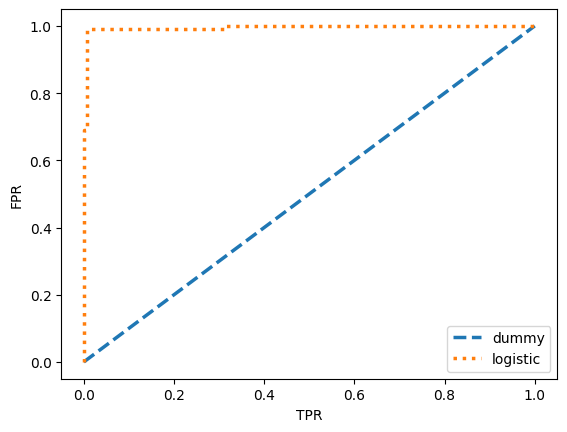

In [60]:
from matplotlib import pyplot
pyplot.plot(fpr_dum,tpr_dum,linestyle  = '--',linewidth = 2.5,label = "dummy")
pyplot.plot(fpr_mob,tpr_mob,linestyle  = ':',linewidth = 2.5,label = "logistic")
pyplot.legend()
pyplot.xlabel("TPR")
pyplot.ylabel("FPR")
